In [39]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import pandas as pd

In [40]:
cancer = load_breast_cancer(as_frame=True)
X = cancer.data 
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train.describe()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,...,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,14.093847,19.341533,91.698945,650.784171,0.095789,0.103143,0.088446,0.048049,0.180493,0.062710,...,16.266560,25.816307,107.220678,879.696734,0.132259,0.257170,0.278710,0.114485,0.292938,0.084229
std,3.489558,4.500457,24.063881,340.295183,0.013349,0.053362,0.081509,0.038697,0.028055,0.007314,...,4.849813,6.328322,33.774071,565.421849,0.022681,0.164706,0.221662,0.067716,0.065137,0.019050
min,6.981000,9.710000,43.790000,143.500000,0.062510,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.081250,0.034320,0.000000,0.000000,0.156600,0.055210
25%,11.662500,15.990000,74.902500,417.100000,0.085902,0.062760,0.027920,0.019675,0.161625,0.057480,...,13.062500,21.322500,84.020000,518.700000,0.115300,0.141650,0.107300,0.063532,0.250050,0.071155
50%,13.275000,18.825000,86.040000,544.050000,0.095005,0.088165,0.058635,0.032300,0.178050,0.061280,...,14.915000,25.490000,97.620000,682.000000,0.131300,0.216400,0.227300,0.097000,0.283100,0.079870
75%,15.772500,21.832500,103.675000,777.400000,0.104750,0.129775,0.132375,0.073910,0.195300,0.066110,...,18.805000,29.452500,126.075000,1092.250000,0.146375,0.341175,0.385900,0.166950,0.320600,0.092172
max,25.730000,39.280000,174.200000,2010.000000,0.142500,0.345400,0.426400,0.191300,0.304000,0.097440,...,33.130000,49.540000,229.300000,3432.000000,0.218400,1.058000,1.252000,0.291000,0.663800,0.207500


In [41]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Accuracy: 0.9181286549707602
Cross Validation Scores: 0.9173420276354604
Classification Report:
               precision    recall  f1-score   support

   malignant       0.89      0.89      0.89        64
      benign       0.93      0.93      0.93       107

    accuracy                           0.92       171
   macro avg       0.91      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171



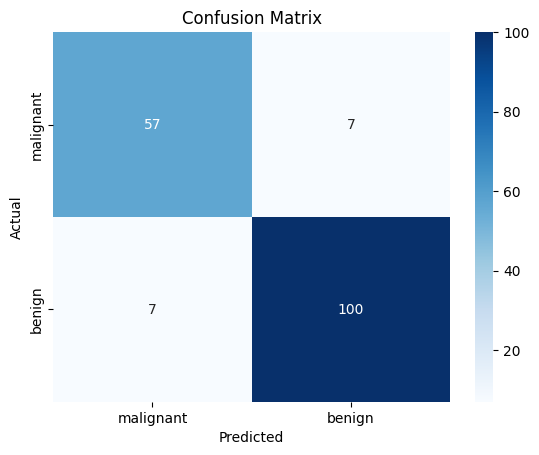

In [42]:
y_pred = clf.predict(X_test)
cross_scores = cross_val_score(clf, X, y, cv=5)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Cross Validation Scores:", cross_scores.mean())
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=cancer.target_names))


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

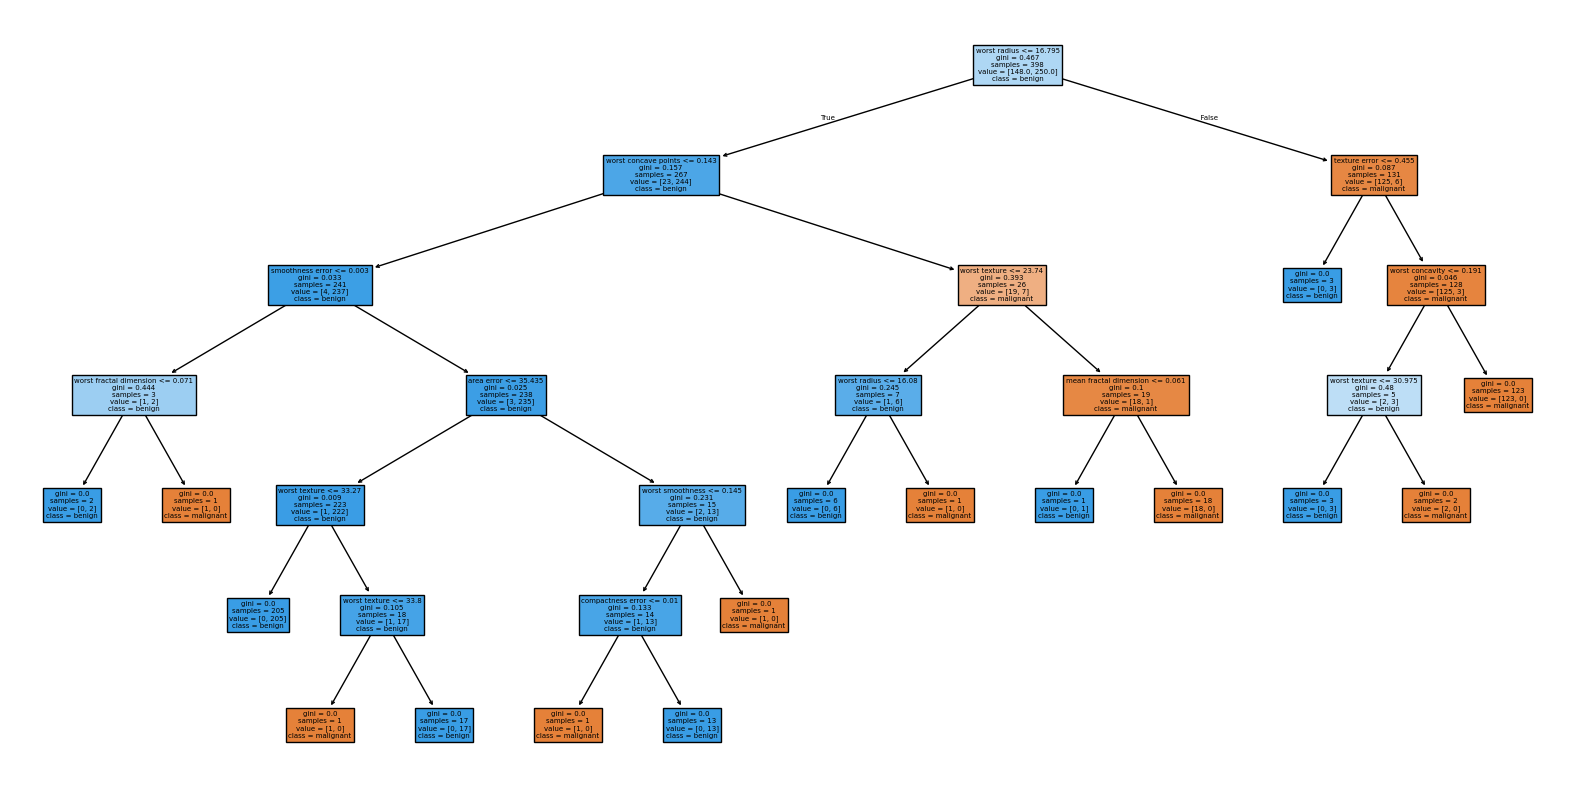

In [43]:
# plot decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=cancer.feature_names, class_names=cancer.target_names)
plt.show()
